# Airbnb price prediction

## Data exploration

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style= "darkgrid")

### Load data


In [43]:
dir_seatle = "data/Seatle"
dir_boston = "data/Boston/"

seatle_data = pd.read_csv(os.path.join(dir_seatle, "listings.csv"))
boston_data = pd.read_csv(os.path.join(dir_boston, "listings.csv"))
seatle_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [44]:
seatle_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [45]:
boston_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [46]:
seatle_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [47]:
seatle_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


## Data cleaning


First of all, the column of price is not in the right format we need to convert it to float.

In [48]:
# Convert columns with dollar symbol ($) and , symbol (,) to float
seatle_data["price"] = seatle_data["price"].str.replace(',', '').str.replace('$', '').astype(float)
boston_data["price"] = boston_data["price"].str.replace(',', '').str.replace('$', '').astype(float)
seatle_data.dropna(subset=["price"], inplace=True)
boston_data.dropna(subset=["price"], inplace=True)

Remove outliers

In [49]:
# remove instance with more than 500 dollars 
seatle_data = seatle_data[seatle_data['price'] < 500]
boston_data = boston_data[boston_data['price'] < 500]

print("Seattle listings: {}".format(len(seatle_data)))
print("Boston listings: {}".format(len(boston_data)))

Seattle listings: 3786
Boston listings: 3495


In [50]:
#make a list of wanted columns
cols_to_keep = [
       'id', 'space', 'neighborhood_overview','host_since', 'host_response_time', 'host_response_rate',
        'host_is_superhost', 'neighbourhood','zipcode','latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'price', 'extra_people', 'minimum_nights','maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365',  'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value', 
       'reviews_per_month']

In [51]:
seatle_data = seatle_data[cols_to_keep]
boston_data = boston_data[cols_to_keep]

In [52]:
def get_cat_num_columns(df):
    '''return the list of categorical and numeric columns'''
    num_columns = df.select_dtypes(include=np.number).columns.tolist()
    cat_columns = df.columns.drop(num_columns)
    return cat_columns, num_columns

def get_nan_percentage(df):
    ''' return the nan percentage for each column in df.
    
    '''
    # percentage of values that are missing
    total_nan = df.isna().sum().sort_values(ascending=False)
    percentage_nan = (total_nan / df.shape[0]) * 100
    tabel = pd.concat([total_nan, percentage_nan], axis=1, keys=['Total_nan_values', 'Percentage_of_nan_values'])
    return tabel

In [53]:
seatle_cat_cols, seatle_num_cols = get_cat_num_columns(seatle_data)
boston_cat_cols, boston_num_cols = get_cat_num_columns(boston_data)

Text(0.5, 1.0, 'Seatle columns with nan values percentage higher than 10')

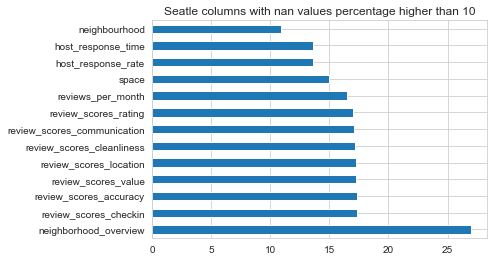

In [54]:
nan_data = get_nan_percentage(seatle_data)
nan_perc = 10
nan_data["Percentage_of_nan_values"][nan_data["Percentage_of_nan_values"] > nan_perc].plot.barh()

plt.title("Seatle columns with nan values percentage higher than {}".format(nan_perc))

Text(0.5, 1.0, 'Seatle columns with nan values percentage higher than 10')

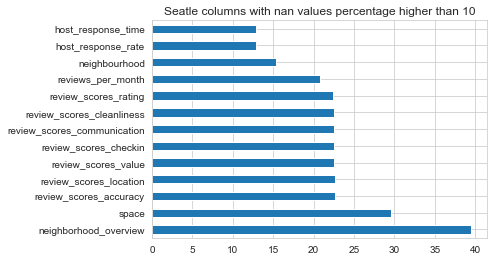

In [55]:
nan_data = get_nan_percentage(boston_data)
nan_perc = 10
nan_data["Percentage_of_nan_values"][nan_data["Percentage_of_nan_values"] > nan_perc].plot.barh()

plt.title("Seatle columns with nan values percentage higher than {}".format(nan_perc))

### Fill missing values

First we verify if the target has missing values in both datasets

In [56]:
# count nan values
print("Seatle price has {} nan values".format(seatle_data["price"].isnull().sum()))
print("Boston price has {} nan values".format(boston_data["price"].isnull().sum()))

Seatle price has 0 nan values
Boston price has 0 nan values


#### Handling values type
 Handling numeric and categorical values separately. 
 


**Categorical fill nan**

In [57]:
# impute missing values with the most frequent class
# seatle data
for var in seatle_cat_cols:
    seatle_data[var].fillna(seatle_data[var].value_counts().index[0], inplace=True)
    
# Boston data
for var in boston_cat_cols:
    boston_data[var].fillna(boston_data[var].value_counts().index[0], inplace=True)



**Numerical fill ann**

In [58]:
# Seatle data
for var in seatle_num_cols:
    seatle_data[var].fillna((seatle_data[var].mean()), inplace=True)
# Boston data
for var in boston_num_cols:
    boston_data[var].fillna((boston_data[var].mean()), inplace=True)

In [59]:
# verify if there is nan values
seatle_data.isnull().sum().max()

0

In [60]:
# verify if there is nan values
boston_data.isnull().sum().max()

0

 Before work with numeric and categorical data, some numeric columns are declared as objects with others symbols. Therefore, we start by converting these columns to float. 


In [61]:
# convert host_response_rate column which have % symbol to float
seatle_data["host_response_rate"] = seatle_data["host_response_rate"].str.replace('%', '').astype(float)
boston_data["host_response_rate"] = boston_data["host_response_rate"].str.replace('%', '').astype(float)

In [62]:
# Create 3 new col which holds only year, month and month-year seperately for host since col. 
# This will help us in our analysis to answer business questions.

seatle_data['host_since_Year'] = pd.DatetimeIndex(seatle_data['host_since']).year.astype(int)
seatle_data['host_since_month'] = pd.DatetimeIndex(seatle_data['host_since']).month.astype(int)
seatle_data['host_since_year-month'] = pd.to_datetime(seatle_data['host_since']).dt.to_period('M')

boston_data['host_since_Year'] = pd.DatetimeIndex(boston_data['host_since']).year.astype(int)
boston_data['host_since_month'] = pd.DatetimeIndex(boston_data['host_since']).month.astype(int)
boston_data['host_since_year-month'] = pd.to_datetime(boston_data['host_since']).dt.to_period('M')




In [63]:

# Convert zip code to numeric
seatle_data['zipcode'] = pd.to_numeric(seatle_data['zipcode'], errors='coerce')
boston_data['zipcode'] = pd.to_numeric(boston_data['zipcode'], errors='coerce')
# remove rows with misisng zipcode
seatle_data = seatle_data.dropna(subset=['zipcode'], how='any', axis =0)
boston_data = boston_data.dropna(subset=['zipcode'], how='any', axis =0)
# convert zip code to int
seatle_data['zipcode']=seatle_data['zipcode'].astype(int)
boston_data['zipcode']=boston_data['zipcode'].astype(int)

# Three insights

In this notebook we will explore three insights in both Seatle and Boston datasets. We will address the two datasets with main three points:

* Which city is most expensive?
* Which are the property types the most hosted?
* Which are the most expensive and cheapest neighbourhood in Seatle and Boston?

As a bonus, we predict the Airbnb price using LightGBM algorithm.

## Price comparison

First of all we plot the price histogram of both datasets to inspect the distribution. Because we have outliers in price, the plot is cliped on 500 dollars as maximum price for better visualization.

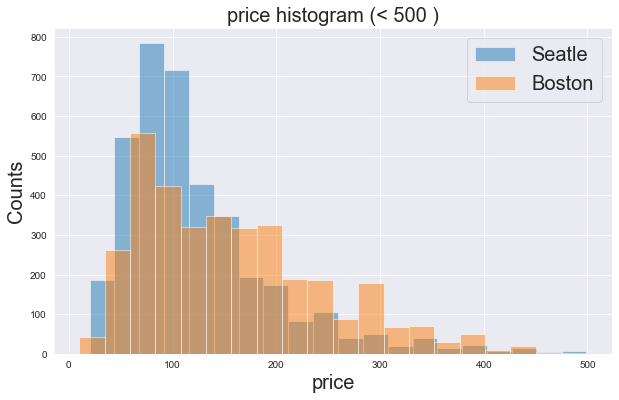

In [68]:
def plot_multiple_hist(df1,df2, col, thresh = None, bins = 20): 
    """Plot multiple histogram in one gfigure
    Arguments:
    - df1: first dataframe
    - df2: second fdataframe
    - col: the variable name (column)
    - thresh: threshold used for shifted data, if given threshold values < thresh are plotted
    - bins: used for histogram plot
    Outputs: 
    - The two histograms of col in df1 and df2
    """
    f = plt.figure(figsize=(10,6))
    if thresh:
        data1 = df1[col][df1[col]< thresh]
        data2 = df2[col][df2[col]< thresh]
    else:
        data1 = df1[col]
        data2 = df2[col]
    data1.hist(bins = bins, alpha = 0.5, label='Seatle')
    data2.hist(bins = bins, alpha = 0.5, label='Boston')
    plt.legend(fontsize=20)
    plt.xlabel(col, fontsize=20)
    plt.ylabel("Counts", fontsize=20)


    if thresh :
        plt.title("{} histogram (< {} )".format(col, thresh), fontsize=20)
    else:
        plt.title(col+ " histogram")
    plt.savefig("figures/price_histogram.png", dpi = 600,  bbox_inches='tight')
plot_multiple_hist(seatle_data,boston_data, "price", thresh=500)

It is clear that Boston prices are little bit higher and regrouped between 70  and 300, while most of Seatle prices are between 10 and 200.

In the following chart, the mean, the median, and the 3rd quartile are dropped for both datasets.

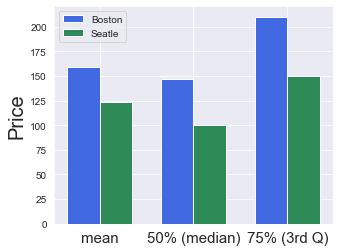

In [69]:
# get mean, median and 3rd quartile of the price.
se = seatle_data["price"].describe().drop(["count", "min", "max","std","25%"])
bo = boston_data["price"].describe().drop(["count", "min", "max","std","25%"])
# plot mean, median, 3rd Q
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ind = np.array([1, 2, 3])
rects1 = ax.bar(ind, bo, 0.35, color='royalblue', label = 'Boston')
rects2 = ax.bar(ind+0.35, se, 0.35, color='seagreen', label = 'Seatle')
plt.xticks(ind+0.35/2 , ('mean', '50% (median)', '75% (3rd Q)'), fontsize=15)
plt.ylabel("Price", fontsize=20)
plt.xlabel("",fontsize=20)
# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.savefig("figures/price_metrics.png", dpi = 600,  bbox_inches='tight')

**Based on mean, median and the thrd quartile it is clear that Boston city is expensive than Seatle.**

## What type of property is most hosted

In [25]:
prop_seatle = seatle_data.groupby("property_type")["id"].count()
prop_boston = boston_data.groupby("property_type")["id"].count()
print("Seattle has {} properties ".format(len(prop_seatle)))
print("Boston has {} properties ".format(len(prop_boston)))

Seattle has 16 properties 
Boston has 13 properties 


In [26]:
# properties only in Seattle
prop_not_in_boston = [x for x in prop_seatle.index.to_list() if x not in prop_boston.index.to_list()]
prop_not_in_boston

['Bungalow', 'Cabin', 'Chalet', 'Tent', 'Treehouse', 'Yurt']

In [27]:
# Properties only in Boston
prop_not_in_seatle = [x for x in prop_boston.index.to_list() if x not in prop_seatle.index.to_list()]
prop_not_in_seatle

['Entire Floor', 'Guesthouse', 'Villa']

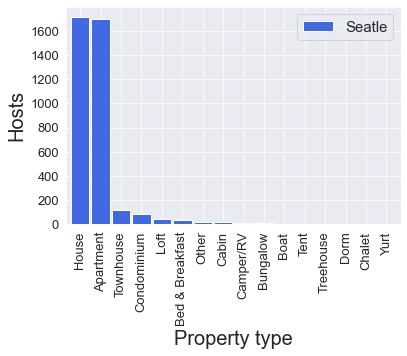

In [70]:
def plot_prop_byhosts(df, name="Seattle", color = "royalblue"):
    """Plot the numbers of hosting for each type of property"""
    perc_seatle = df.groupby("property_type")["id"].count().sort_values(ascending = False)
    perc_seatle.plot(kind = 'bar', width= 0.9, color=color, label = 'Seatle', fontsize=13)
    plt.ylabel("Hosts", fontsize=20)
    plt.xlabel("Property type", fontsize=20)
    # Finding the best position for legends and putting it
    plt.legend(loc='best', fontsize=15)
    plt.savefig("figures/{}_propType.png".format(name), dpi = 600,  bbox_inches='tight')
    plt.show()
plot_prop_byhosts(seatle_data, name="Seattle")

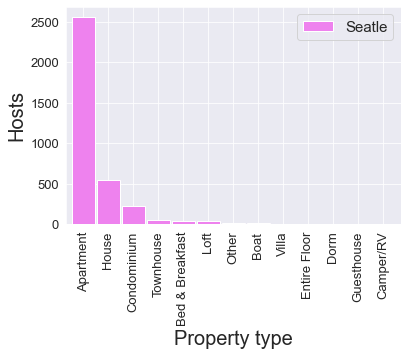

In [71]:
plot_prop_byhosts(boston_data, name="Boston", color = "violet")

In [30]:
boston_data.groupby("property_type")["id"].count().sort_values(ascending = False)[:6].index.to_list()

['Apartment', 'House', 'Condominium', 'Townhouse', 'Bed & Breakfast', 'Loft']

We can notice that Apartement, House, Condominium, and Townhouse are the most hosted properties. Lets see their percentage to the overall all hosts!


In [31]:
perc_seatle = (seatle_data.groupby("property_type")["id"].count().sort_values(ascending = False)/len(seatle_data)*100)[:6].sum()
perc_boston = (boston_data.groupby("property_type")["id"].count().sort_values(ascending = False)/len(boston_data) * 100)[:6].sum()

print("Six property types cover over {} % hosts for Seattle, and {} % hosts for Boston ".format(perc_seatle, perc_boston))

Six property types cover over 97.67503302509907 % hosts for Seattle, and 98.82622387632408 % hosts for Boston 


## Price by Neighbourhood 
We create a barchart that plots and compares neighbourhoods based on price

Credits to " https://github.com/OliviaCrrbb/Boston-Airbnb-Price-Analysis-Modelling/blob/main/Airbnb%20Boston%20Price%20Analysis%26Modelling%20.ipynb "

In [44]:
def barchart(df_lis,group_col, column,sort_value):
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    df_lis_map_price = df_lis.sort_values(by = sort_value)
    sns.barplot(x=group_col, y=column, data = df_lis)
    plt.xlabel(xlabel='{} Neihbourhoods'.format(group_col), fontsize=18)
    plt.ylabel(ylabel=column, fontsize=18)

In [32]:
seatl_nei = seatle_data["neighbourhood"].nunique()
print("there are {} neighbourhoods in Seatle city".format(seatl_nei))

there are 81 neighbourhoods in Seatle city


In [33]:
boston_nei = boston_data["neighbourhood"].nunique()
print("there are {} neighbourhoods in Boston city".format(boston_nei))

there are 30 neighbourhoods in Boston city


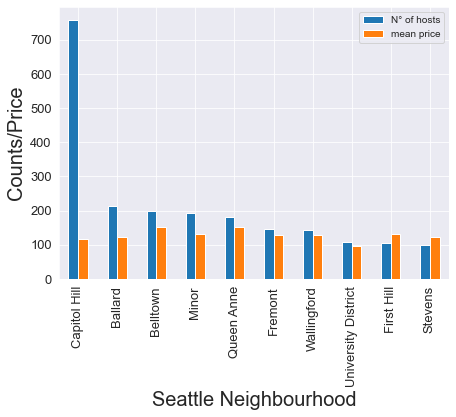

In [79]:

def neighbourhoods_impact(data, group_feat, sort_feat, cols_to_plot, labels, name):
    """plot features based on neighbourhood impact
    
    Arguments:
    - data: dataframe of data.
    - group_feat: feature used to goupeby.
    - sort_feat: feature used to sort the grouped values.
    - cols_to_plot: list of columns names to be plotted.
    - labels: list of labels to describe the plot (same size as cols_to_plot).
    - name: the name of the data used to save figure.
    Outputs: 
    - Plot of two features based on grouped data
    
    Example:
    
    data = seattle_data
    group_feat = "neghbourhood"
    sort_feat = "count"
    labels = ["N° of hosts", "mean price"]
    name = "Seattle"
    
    neighbourhoods_impact(data, group_feat, sort_feat, cols_to_plot, labels, name)
    
    """
    gr = data.groupby(group_feat)["price"].describe().sort_values(by = sort_feat , ascending = False)[cols_to_plot][:10]
    gr[group_feat] = gr.index
    # plot top 10 
    gr.plot(x=group_feat , y=cols_to_plot,kind = "bar", figsize=(7,5), grid=True, label = labels, fontsize=13)
    plt.ylabel("Counts/Price", fontsize=20)
    plt.xlabel("{} Neighbourhood".format(name), fontsize=20)
    plt.savefig("figures/{}_neigh_counts_price.png".format(name), dpi = 600,  bbox_inches='tight')
    
group_feat = "neighbourhood"
sort_feat = "count"
cols_to_plot = ["count", "mean"]
labels = ["N° of hosts", "mean price"]
name = "Seattle"

neighbourhoods_impact(seatle_data, group_feat, sort_feat, cols_to_plot, labels, name)

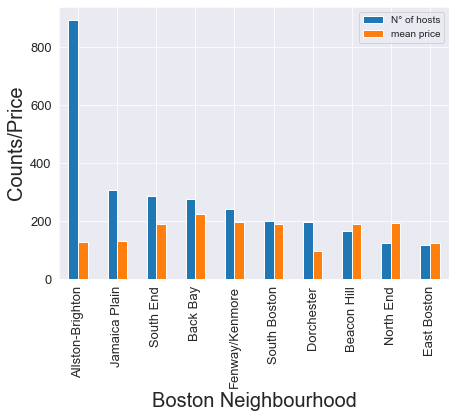

In [80]:
group_feat = "neighbourhood"
sort_feat = "count"
cols_to_plot = ["count", "mean"]
labels = ["N° of hosts", "mean price"]
name = "Boston"

neighbourhoods_impact(boston_data, group_feat, sort_feat, cols_to_plot, labels, name)

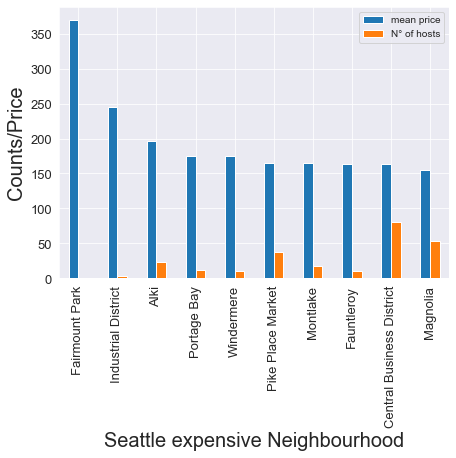

In [83]:
group_feat = "neighbourhood"
sort_feat = "mean"
cols_to_plot = ["mean", "count"]
labels = [ "mean price", "N° of hosts"]
name = "Seattle expensive"

neighbourhoods_impact(seatle_data, group_feat, sort_feat, cols_to_plot, labels, name)

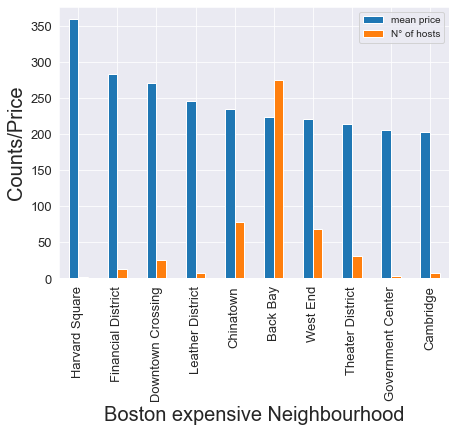

In [84]:
group_feat = "neighbourhood"
sort_feat = "mean"
cols_to_plot = ["mean", "count"]
labels = [ "mean price", "N° of hosts"]
name = "Boston expensive"

neighbourhoods_impact(boston_data, group_feat, sort_feat, cols_to_plot, labels, name)

If you look at the cheapest neighbourhoods you can check

In [85]:
cheap_nei_se = seatle_data.groupby("neighbourhood")["price"].describe()["mean"].sort_values(ascending = False).index[-5:]
print("cheapest neighbourhoods in Seatle city are {} ".format(list(cheap_nei_se)))

cheapest neighbourhoods in Seatle city are ['Georgetown', 'Rainier Beach', 'Dunlap', 'Olympic Hills', 'Roxhill'] 


In [86]:
cheap_nei_bo = boston_data.groupby("neighbourhood")["price"].describe()["mean"].sort_values(ascending = False).index[-5:]
print("cheapest neighbourhoods in Boston city are {} ".format(list(cheap_nei_bo)))

cheapest neighbourhoods in Boston city are ['Dorchester', 'Hyde Park', 'Somerville', 'Mattapan', 'Chestnut Hill'] 


# Conclusion

In this article, we explored Airbnb data from Seattle and Boston to understand three areas of interest: pricing, property type, and neighborhood impact. While we found useful information at each level, many questions remain, like which characteristics and their associated impact make each neighborhood different from the others. In addition, further inspection of the listings by seasonality could yield more information to accurately select the best features for the price prediction task.